In [1]:
#Import packages
import os
import glob
import json
#from tqdm import tqdm

import nilearn
import nibabel as nib
from nilearn import image as nimg
from nilearn import plotting as nplot
from nilearn.glm.first_level import FirstLevelModel, make_first_level_design_matrix, run_glm
from nilearn.glm import fdr_threshold,threshold_stats_img
from nilearn.glm.contrasts import compute_contrast


from bids.layout import BIDSLayout, parse_file_entities

# import cortex
# from cortex import fmriprep

from nipype.interfaces.workbench.base import WBCommand
from nipype.algorithms import modelgen
from nipype.interfaces.base import Bunch

import hcp_utils as hcp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

from PIL import Image

import first_level_sparse_scanning as flss 
import importlib


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [4]:
out_dir='../../derivatives/first_level_110123/'
events_path_pattern = f'/nese/mit/group/sig/om_projects/voice/bids/data/sub-voice*/ses-*/func/*events.tsv'
pop_events = flss.find_populated_events(events_path_pattern)
count_pop_events = pop_events.groupby('task').populated.value_counts()

valid_runs = pop_events.events_file[pop_events.populated == True]
parsed_valid_runs = [parse_file_entities(vr) for vr in valid_runs]

subjects_excluded = ['voice997', 'voice897','voice863'] #for some reason these one is not in the fmriprep output
parsed_valid_runs = [pvr for pvr in parsed_valid_runs if pvr['subject'] not in subjects_excluded]

low_acompcor_to_drop = flss.find_low_acompcor(parsed_valid_runs)
parsed_valid_runs = [r for r in parsed_valid_runs if r not in low_acompcor_to_drop]

tasks_included = ['pataka', 'emosent', 'vowel', 'nwr']
parsed_valid_runs = [r for r in parsed_valid_runs if any(t == r['task'] for t in tasks_included)]

In [ ]:
importlib.reload(flss)
flss.convolve_sparse_scan_glm_with_cifti(parsed_valid_runs, out_dir)

started sub-voice844_ses-1_task-pataka_rec-unco_run-2
231101-17:54:59,515 nipype.interface INFO:
	 Setting dt = 64 ms

231101-17:54:59,517 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0135
231101-17:54:59,518 nipype.interface INFO:
	 reg_scale: 74.2276
231101-17:54:59,525 nipype.interface INFO:
	 Setting dt = 64 ms

231101-17:54:59,528 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0135
231101-17:54:59,528 nipype.interface INFO:
	 reg_scale: 74.2276
231101-17:54:59,536 nipype.interface INFO:
	 Setting dt = 64 ms

231101-17:54:59,539 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0135
231101-17:54:59,540 nipype.interface INFO:
	 reg_scale: 74.2276
231101-17:54:59,547 nipype.interface INFO:
	 Setting dt = 64 ms

231101-17:54:59,550 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0135
231101-17:54:59,550 nipype.interface INFO:
	 reg_scale: 74.2276
finished sub-voice844_ses-1_task-pataka_rec-unco_run-2
started sub-voice844_ses-1_task-emosent_rec-unco_run-1
231101-1

231101-17:56:29,968 nipype.interface INFO:
	 reg_scale: 74.2276
finished sub-voice846_ses-1_task-pataka_rec-unco_run-2
started sub-voice846_ses-1_task-emosent_rec-unco_run-1
231101-17:56:43,425 nipype.interface INFO:
	 Setting dt = 110 ms

231101-17:56:43,427 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231101-17:56:43,427 nipype.interface INFO:
	 reg_scale: 43.1973
231101-17:56:43,431 nipype.interface INFO:
	 Setting dt = 110 ms

231101-17:56:43,433 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231101-17:56:43,434 nipype.interface INFO:
	 reg_scale: 43.1973
231101-17:56:43,438 nipype.interface INFO:
	 Setting dt = 110 ms

231101-17:56:43,439 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231101-17:56:43,440 nipype.interface INFO:
	 reg_scale: 43.1973
231101-17:56:43,444 nipype.interface INFO:
	 Setting dt = 110 ms

231101-17:56:43,445 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231101-17:56:43,446 nipype.interface INFO:
	 reg_scale: 43

231101-17:58:27,105 nipype.interface INFO:
	 Setting dt = 110 ms

231101-17:58:27,107 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231101-17:58:27,107 nipype.interface INFO:
	 reg_scale: 43.1973
231101-17:58:27,110 nipype.interface INFO:
	 Setting dt = 110 ms

231101-17:58:27,112 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231101-17:58:27,113 nipype.interface INFO:
	 reg_scale: 43.1973
231101-17:58:27,116 nipype.interface INFO:
	 Setting dt = 110 ms

231101-17:58:27,119 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231101-17:58:27,119 nipype.interface INFO:
	 reg_scale: 43.1973
231101-17:58:27,123 nipype.interface INFO:
	 Setting dt = 110 ms

231101-17:58:27,125 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231101-17:58:27,125 nipype.interface INFO:
	 reg_scale: 43.1973
finished sub-voice849_ses-1_task-emosent_rec-unco_run-1
started sub-voice849_ses-1_task-emosent_rec-unco_run-2
231101-17:58:38,892 nipype.interface INFO:
	 Setting dt =

231101-18:00:09,374 nipype.interface INFO:
	 reg_scale: 74.2276
231101-18:00:09,382 nipype.interface INFO:
	 Setting dt = 64 ms

231101-18:00:09,385 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0135
231101-18:00:09,385 nipype.interface INFO:
	 reg_scale: 74.2276
231101-18:00:09,392 nipype.interface INFO:
	 Setting dt = 64 ms

231101-18:00:09,394 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0135
231101-18:00:09,394 nipype.interface INFO:
	 reg_scale: 74.2276
231101-18:00:09,401 nipype.interface INFO:
	 Setting dt = 64 ms

231101-18:00:09,404 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0135
231101-18:00:09,404 nipype.interface INFO:
	 reg_scale: 74.2276
finished sub-voice850_ses-1_task-pataka_rec-unco_run-2
started sub-voice850_ses-1_task-emosent_rec-unco_run-1
231101-18:00:22,606 nipype.interface INFO:
	 Setting dt = 110 ms

231101-18:00:22,608 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231101-18:00:22,608 nipype.interface INFO:
	 reg_scale: 43.19

In [4]:
image = nimg.load_img('test/sub-voice980_ses-1_task-nwr_rec-unco_run-1_space-fsLR_den-91k_contrast-spchsil_z_score.dscalar.nii')
contrast_maps = pd.DataFrame(image.get_fdata(dtype='f4')).T

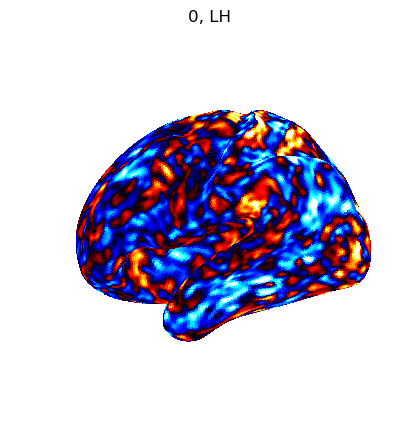

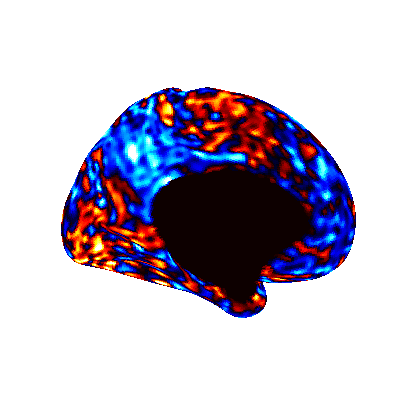

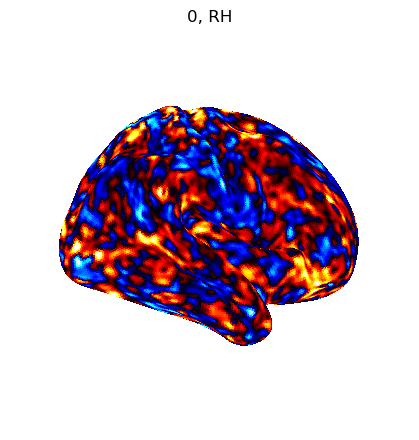

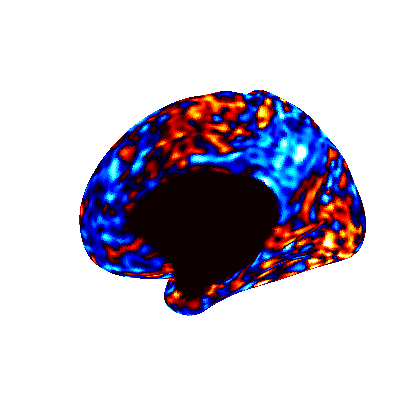

In [5]:
vmax = 3
for c in contrast_maps.columns:
    
    title = c
    nplot.plot_surf_stat_map(
        hcp.mesh.inflated, hcp.cortex_data(contrast_maps[c]), hemi='left', #threshold=thresholds[c],
        symmetric_cbar = False,
        colorbar=False,
        title = f'{title}, LH', #output_file=f'{root}/{c}_hemi-LH_view-lateral.png',
        title_font_size=30, vmax = vmax,
        bg_map=hcp.mesh.sulc)

    nplot.plot_surf_stat_map(
        hcp.mesh.inflated_left, hcp.left_cortex_data(contrast_maps[c]), view= 'lateral',
        hemi='right', #threshold=thresholds[c],
        symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-LH_view-medial.png',
        colorbar=False, vmax = vmax,  
        bg_map=hcp.mesh.sulc_left)

    nplot.plot_surf_stat_map(
        hcp.mesh.inflated, hcp.cortex_data(contrast_maps[c]), hemi='right', #threshold=thresholds[covariate],
        symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-RH_view-lateral.png',
        colorbar=False,
        title = f'{title}, RH', vmax = vmax,
        bg_map=hcp.mesh.sulc)

    nplot.plot_surf_stat_map(
        hcp.mesh.inflated_right, hcp.left_cortex_data(contrast_maps[c]), view= 'lateral',
        hemi='left', #threshold=thresholds[covariate],
        symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-RH_view-medial.png',
        colorbar=False, vmax = vmax,
        bg_map=hcp.mesh.sulc_right)
    
    nplot.show()